In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## DACC LAB PROJECT 

## House Price Prediction using Polynomial Regression and 

In [63]:
#CRIM:  This is the per capita crime rate by town
#ZN:    This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
#INDUS: This is the proportion of non-retail business acres per town.
#CHAS:  This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
#NOX:   This is the nitric oxides concentration (parts per 10 million)
#RM:    This is the average number of rooms per dwelling
#AGE:   This is the proportion of owner-occupied units built prior to 1940
#DIS:   This is the weighted distances to five Boston employment centers
#RAD:   This is the index of accessibility to radial highways
#TAX:   This is the full-value property-tax rate per $10,000
#PTRATIO: This is the pupil-teacher ratio by town
#B:     This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
#LSTAT: This is the percentage lower status of the population
#MEDV:  This is the median value of owner-occupied homes in $1000s

In [64]:
df=pd.read_csv("HousingData.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## Data Preprocessing & cleaning

In [65]:
#Check if there are any missing values

df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

<AxesSubplot:>

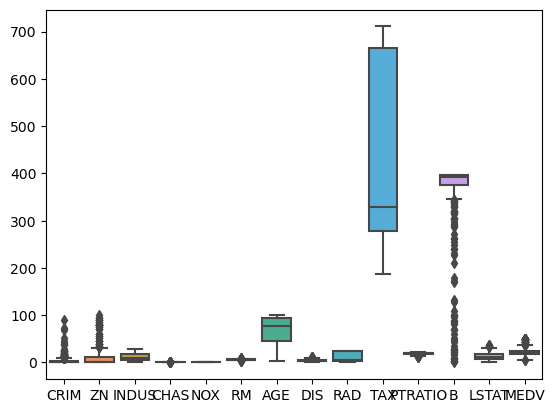

In [66]:
sns.boxplot(data=df)

<AxesSubplot:>

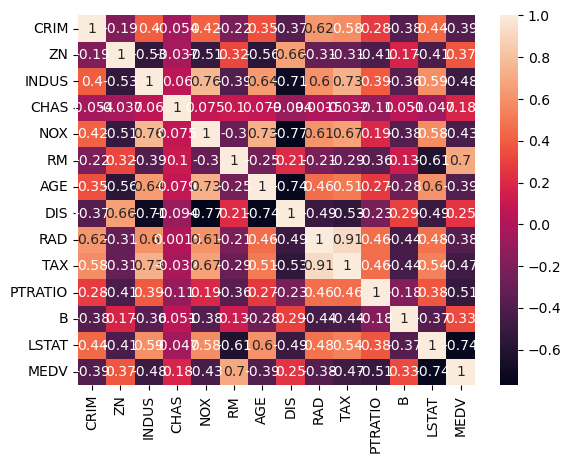

In [67]:
sns.heatmap(df.corr(),annot=True
           )

#Can see the correlation between each columns

In [68]:
# Few columns like INDUS,ZN,CHAS, AGE,DIS,B do not affect the Target Column 'MEDV', so we can remove them

In [69]:
cols= ['INDUS','ZN','CHAS','AGE','DIS','B']
df.drop(cols, axis=1, inplace=True)
df

,CRIM,NOX,RM,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,0.538,6.575,1,296,15.3,4.98,24.0
1,0.02731,0.469,6.421,2,242,17.8,9.14,21.6
2,0.02729,0.469,7.185,2,242,17.8,4.03,34.7
3,0.03237,0.458,6.998,3,222,18.7,2.94,33.4
4,0.06905,0.458,7.147,3,222,18.7,NaN,36.2
...,...,...,...,...,...,...,...,...
501,0.06263,0.573,6.593,1,273,21.0,NaN,22.4
502,0.04527,0.573,6.120,1,273,21.0,9.08,20.6
503,0.06076,0.573,6.976,1,273,21.0,5.64,23.9
504,0.10959,0.573,6.794,1,273,21.0,6.48,22.0


<AxesSubplot:>

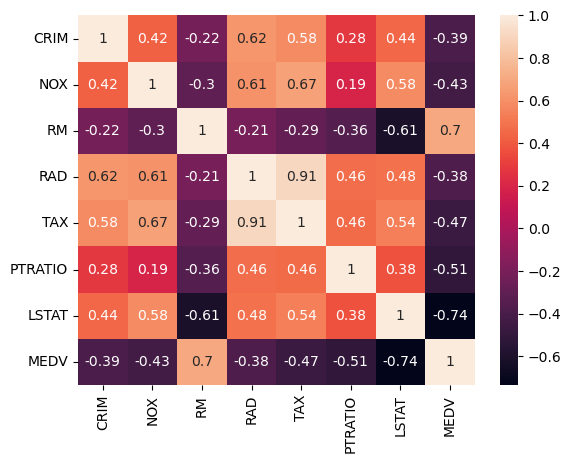

In [70]:
sns.heatmap(df.corr(),annot=True)

In [71]:
# Now check if there are still any null values in the dataset after removing few columns

In [72]:
df.isna().sum()

CRIM       20
NOX         0
RM          0
RAD         0
TAX         0
PTRATIO     0
LSTAT      20
MEDV        0
dtype: int64

In [73]:
#We still have null values in CRIM and LSTAT

In [74]:
df['CRIM'].notnull().value_counts()

True     486
False     20
Name: CRIM, dtype: int64

In [75]:
# So in CRIM we have 486 non null values and 20 null values

In [76]:
df['CRIM'].describe()

count    486.000000
mean       3.611874
std        8.720192
min        0.006320
25%        0.081900
50%        0.253715
75%        3.560263
max       88.976200
Name: CRIM, dtype: float64

In [77]:
df['CRIM'].mode()



0     0.01501
1    14.33370
Name: CRIM, dtype: float64

In [78]:
newdf=df.copy()
newdf
newdf['CRIM'].describe()

count    486.000000
mean       3.611874
std        8.720192
min        0.006320
25%        0.081900
50%        0.253715
75%        3.560263
max       88.976200
Name: CRIM, dtype: float64

In [79]:
#Drop rows whose all values are null
df.dropna(how="all")

,CRIM,NOX,RM,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,0.538,6.575,1,296,15.3,4.98,24.0
1,0.02731,0.469,6.421,2,242,17.8,9.14,21.6
2,0.02729,0.469,7.185,2,242,17.8,4.03,34.7
3,0.03237,0.458,6.998,3,222,18.7,2.94,33.4
4,0.06905,0.458,7.147,3,222,18.7,NaN,36.2
...,...,...,...,...,...,...,...,...
501,0.06263,0.573,6.593,1,273,21.0,NaN,22.4
502,0.04527,0.573,6.120,1,273,21.0,9.08,20.6
503,0.06076,0.573,6.976,1,273,21.0,5.64,23.9
504,0.10959,0.573,6.794,1,273,21.0,6.48,22.0


In [80]:
df.describe()

,CRIM,NOX,RM,RAD,TAX,PTRATIO,LSTAT,MEDV
count,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,0.554695,6.284634,9.549407,408.237154,18.455534,12.715432,22.532806
std,8.720192,0.115878,0.702617,8.707259,168.537116,2.164946,7.155871,9.197104
min,0.006320,0.385000,3.561000,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.081900,0.449000,5.885500,4.000000,279.000000,17.400000,7.125000,17.025000
50%,0.253715,0.538000,6.208500,5.000000,330.000000,19.050000,11.430000,21.200000
75%,3.560263,0.624000,6.623500,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,0.871000,8.780000,24.000000,711.000000,22.000000,37.970000,50.000000


In [81]:
df['CRIM'].dropna(inplace=True,axis=0)
df['CRIM'].mean()

3.6118739711934156

In [82]:
df['CRIM'].isnull().sum()


20

In [83]:
df['CRIM'].fillna(df['CRIM'].mean(),inplace=True)

In [84]:
df.mean()

CRIM         3.611874
NOX          0.554695
RM           6.284634
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
LSTAT       12.715432
MEDV        22.532806
dtype: float64

In [85]:
df['CRIM'].isnull().sum()

0

In [86]:
# So i have replaced the null values in CRIM column by the mean. Now if we see there are no null values in the CRIM column .

In [87]:
df.isna().sum()

CRIM        0
NOX         0
RM          0
RAD         0
TAX         0
PTRATIO     0
LSTAT      20
MEDV        0
dtype: int64

In [88]:
df['LSTAT'].isna().sum()

20

In [89]:
df.describe()

,CRIM,NOX,RM,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,0.554695,6.284634,9.549407,408.237154,18.455534,12.715432,22.532806
std,8.545770,0.115878,0.702617,8.707259,168.537116,2.164946,7.155871,9.197104
min,0.006320,0.385000,3.561000,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.083235,0.449000,5.885500,4.000000,279.000000,17.400000,7.125000,17.025000
50%,0.290250,0.538000,6.208500,5.000000,330.000000,19.050000,11.430000,21.200000
75%,3.611874,0.624000,6.623500,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,0.871000,8.780000,24.000000,711.000000,22.000000,37.970000,50.000000


In [90]:
df['LSTAT'].dropna(inplace=True,axis=0)
df['LSTAT'].mean()
df['LSTAT'].fillna(df['LSTAT'].mean(),inplace=True)

In [91]:
df['LSTAT'].isna().sum()


0

In [92]:
df['LSTAT'].mean()

12.71543209876544

In [93]:
df

,CRIM,NOX,RM,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,0.538,6.575,1,296,15.3,4.980000,24.0
1,0.02731,0.469,6.421,2,242,17.8,9.140000,21.6
2,0.02729,0.469,7.185,2,242,17.8,4.030000,34.7
3,0.03237,0.458,6.998,3,222,18.7,2.940000,33.4
4,0.06905,0.458,7.147,3,222,18.7,12.715432,36.2
...,...,...,...,...,...,...,...,...
501,0.06263,0.573,6.593,1,273,21.0,12.715432,22.4
502,0.04527,0.573,6.120,1,273,21.0,9.080000,20.6
503,0.06076,0.573,6.976,1,273,21.0,5.640000,23.9
504,0.10959,0.573,6.794,1,273,21.0,6.480000,22.0


In [94]:
df.isna().sum()

CRIM       0
NOX        0
RM         0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

In [95]:
#SO PREPROCESSING & CLEANING HAS BEEN CARRIED OUT SUCCESFULLY

## EDA (Explanatory Data Analysis) 

C:\Users\Aakash LS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


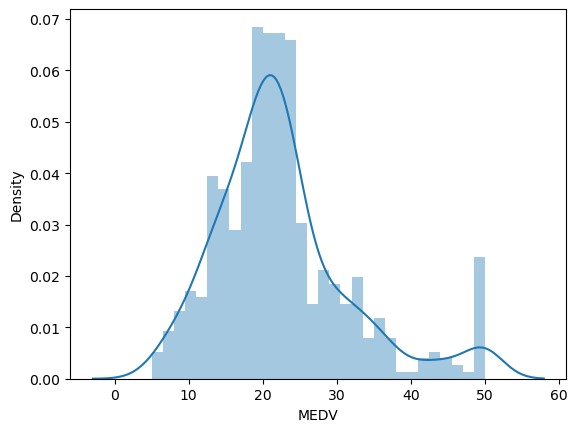

In [96]:


# Distplot gives the distribution of data
sns.distplot(df['MEDV'], bins=30)
plt.show()

In [97]:
# GEt the mean,median , mode, variance,std dev , skewness and kurtosis of the MEDV variabel, i.e the prices of house



# here MEDV is the target variable which we need to predict whereas the other columns are feature variables


hs_price= df['MEDV']

In [98]:
hs_price.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [99]:
df.kurt()

CRIM       38.181353
NOX        -0.064667
RM          1.891500
RAD        -0.867232
TAX        -1.142408
PTRATIO    -0.285091
LSTAT       0.663489
MEDV        1.495197
dtype: float64

In [100]:
df.skew()

CRIM       5.318370
NOX        0.729308
RM         0.403612
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
LSTAT      0.927291
MEDV       1.108098
dtype: float64

In [101]:
hs_price.kurt()

1.495196944165818

In [102]:
hs_price.skew()

1.1080984082549072

In [103]:

#Covariance
df.cov()

,CRIM,NOX,RM,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,73.030192,0.406381,-1.293552,45.307377,815.958407,5.057910,26.011963,-29.842674
NOX,0.406381,0.013428,-0.024603,0.616929,13.046286,0.047397,0.465127,-0.455412
RM,-1.293552,-0.024603,0.493671,-1.283815,-34.583448,-0.540763,-2.970957,4.493446
RAD,45.307377,0.616929,-1.283815,75.816366,1335.756577,8.760716,28.603740,-30.561228
TAX,815.958407,13.046286,-34.583448,1335.756577,28404.759488,168.153141,619.962992,-726.255716
PTRATIO,5.057910,0.047397,-0.540763,8.760716,168.153141,4.686989,5.668169,-10.110657
LSTAT,26.011963,0.465127,-2.970957,28.603740,619.962992,5.668169,49.178507,-46.565119
MEDV,-29.842674,-0.455412,4.493446,-30.561228,-726.255716,-10.110657,-46.565119,84.586724


In [104]:
# CORRELATION

df.corr()

,CRIM,NOX,RM,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,0.410377,-0.215434,0.608886,0.566528,0.273384,0.434044,-0.379695
NOX,0.410377,1.000000,-0.302188,0.611441,0.668023,0.188933,0.572379,-0.427321
RM,-0.215434,-0.302188,1.000000,-0.209847,-0.292048,-0.355501,-0.602962,0.695360
RAD,0.608886,0.611441,-0.209847,1.000000,0.910228,0.464741,0.468440,-0.381626
TAX,0.566528,0.668023,-0.292048,0.910228,1.000000,0.460853,0.524545,-0.468536
PTRATIO,0.273384,0.188933,-0.355501,0.464741,0.460853,1.000000,0.373343,-0.507787
LSTAT,0.434044,0.572379,-0.602962,0.468440,0.524545,0.373343,1.000000,-0.721975
MEDV,-0.379695,-0.427321,0.695360,-0.381626,-0.468536,-0.507787,-0.721975,1.000000


<AxesSubplot:>

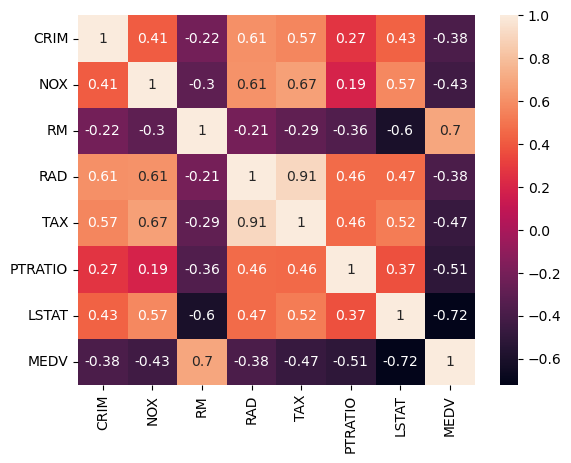

In [105]:
sns.heatmap(df.corr(),annot=True)

In [106]:
# From this we can observe that

# RM is directly proportional to house price (More no. of rooms-> More price)

#LSTAT is inversely proportional to house price (More Lower working cls ppl-> lesser house price)

# PTRATIO is inversely proportional to house price

#Tax is inversely proportional to house price  (More tax, less ppl would opt to buy house in that location)





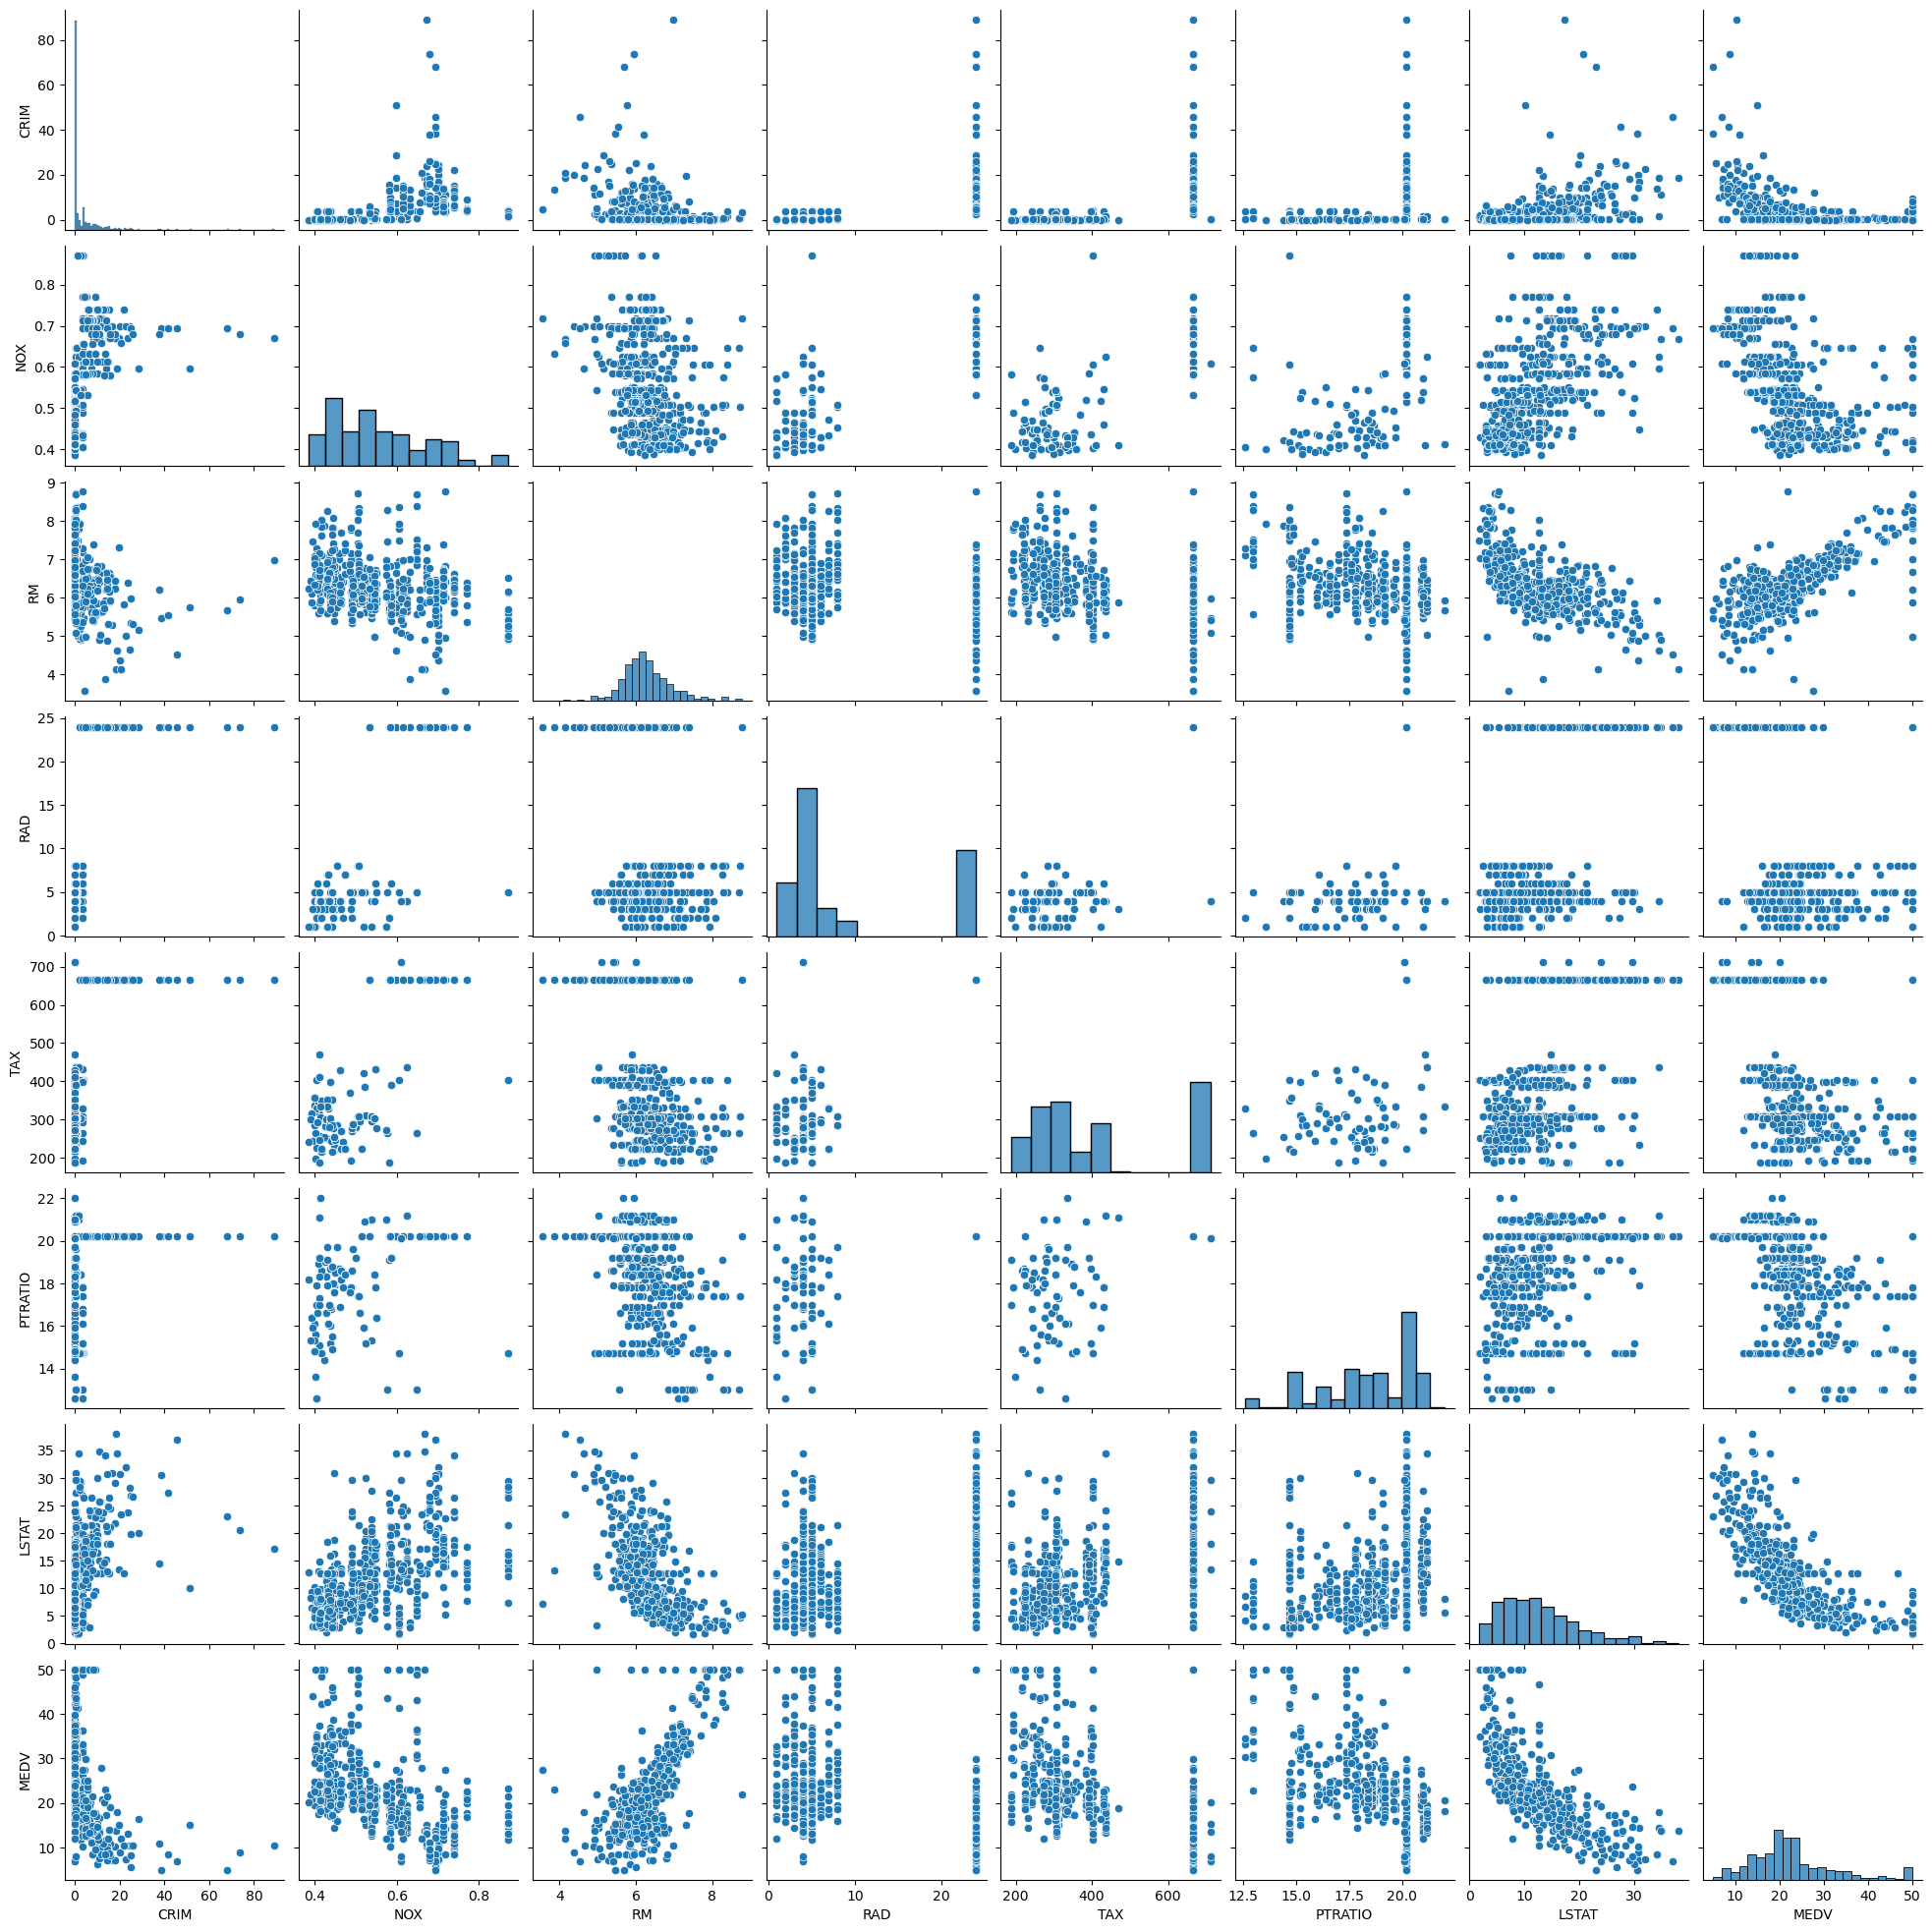

In [107]:
#PAIRPLOT


sns.pairplot(data=df)
plt.show()

In [108]:
df.describe()

,CRIM,NOX,RM,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,0.554695,6.284634,9.549407,408.237154,18.455534,12.715432,22.532806
std,8.545770,0.115878,0.702617,8.707259,168.537116,2.164946,7.012739,9.197104
min,0.006320,0.385000,3.561000,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.083235,0.449000,5.885500,4.000000,279.000000,17.400000,7.230000,17.025000
50%,0.290250,0.538000,6.208500,5.000000,330.000000,19.050000,11.995000,21.200000
75%,3.611874,0.624000,6.623500,24.000000,666.000000,20.200000,16.570000,25.000000
max,88.976200,0.871000,8.780000,24.000000,711.000000,22.000000,37.970000,50.000000


In [109]:
# FROM THE OBSERVATIONS AMONG RM,LSTAT,PTRATIO,TAX-> RM AND LSTAT AFFECT the housing prices the most


## Removing outliers

In [110]:
# SO let's remove the present in RM and LSTAT if any.

In [111]:
df['RM'].describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

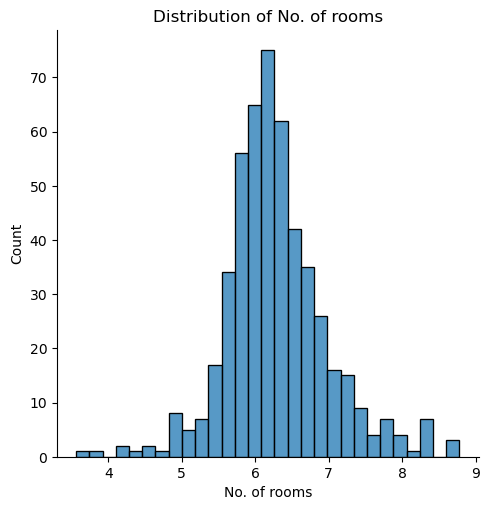

In [112]:
sns.displot(data=df['RM']).set(title="Distribution of No. of rooms", xlabel="No. of rooms")

In [113]:
df['RM'].mean()

6.284634387351787

In [114]:
dfrm.min()

NameError: name 'dfrm' is not defined

In [ ]:
dfrm.max()

In [ ]:
df

In [ ]:
#TO detect the outliers, we need to calculate the lower and the upper limit

In [120]:
dfrm= df['RM']
lower_limit = dfrm.mean() - 3*dfrm.std()
upper_limit = dfrm.mean() + 3*dfrm.std()

print("LOWERLIMIT",lower_limit)
print("UPPERLIMIT",upper_limit)

LOWERLIMIT 4.176782957105816
UPPERLIMIT 8.392485817597757


In [121]:
# So to detect an outlier, it's value must be either mean- 3* stddev  or mean+ 3* stddev

In [122]:
df_upd = df[(df['RM']>lower_limit) & (df['RM']<upper_limit)]
df_upd


,CRIM,NOX,RM,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,0.538,6.575,1,296,15.3,4.980000,24.0
1,0.02731,0.469,6.421,2,242,17.8,9.140000,21.6
2,0.02729,0.469,7.185,2,242,17.8,4.030000,34.7
3,0.03237,0.458,6.998,3,222,18.7,2.940000,33.4
4,0.06905,0.458,7.147,3,222,18.7,12.715432,36.2
...,...,...,...,...,...,...,...,...
501,0.06263,0.573,6.593,1,273,21.0,12.715432,22.4
502,0.04527,0.573,6.120,1,273,21.0,9.080000,20.6
503,0.06076,0.573,6.976,1,273,21.0,5.640000,23.9
504,0.10959,0.573,6.794,1,273,21.0,6.480000,22.0


In [123]:
# SO 8 outliers have been removed from RM column

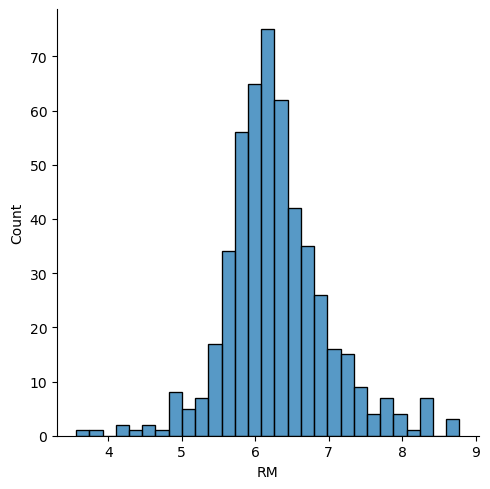

In [124]:
sns.displot(data=df['RM'])

In [ ]:
df

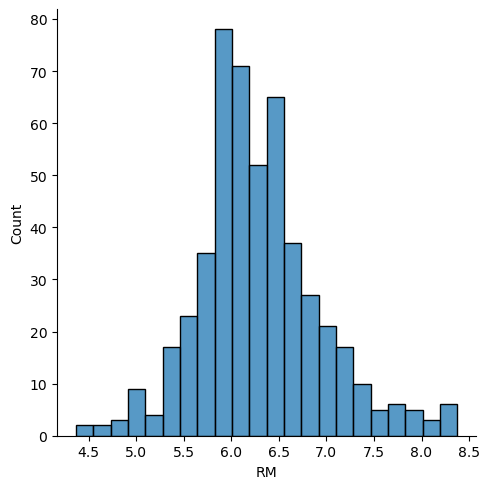

In [125]:
sns.displot(data=df_upd['RM'])

In [ ]:
# NOw we have removed outliers for RM
# Now let's remove outliers in LSTAT

In [126]:
dlstat= df_upd['LSTAT']
dlstat.mean()

12.71345108830384

In [127]:
dlstat= df['LSTAT']
lower_limit_l = dlstat.mean() - 3*dlstat.std()
upper_limit_r = dlstat.mean() + 3*dlstat.std()

print("LOWERLIMIT",lower_limit_l)
print("UPPERLIMIT",upper_limit_r)

LOWERLIMIT -8.322784721980074
UPPERLIMIT 33.75364891951095


In [128]:
dlstat.min()

1.73

In [129]:
dlstat.max()

37.97

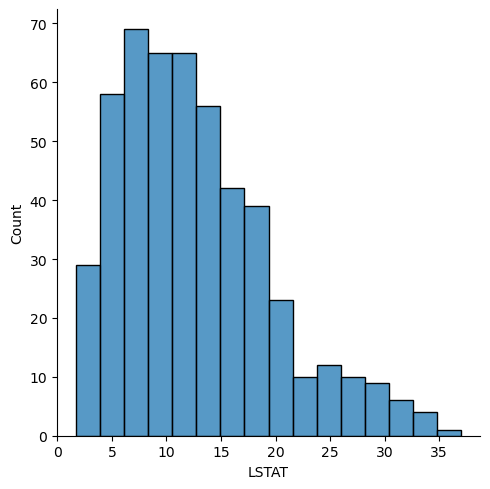

In [130]:
sns.displot(data=df_upd['LSTAT'])

In [132]:
df_final = df_upd[(dlstat>lower_limit_l) & (dlstat<upper_limit_r)]
df_final

C:\Users\Aakash LS\AppData\Local\Temp\ipykernel_19016\4019566866.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_final = df_upd[(dlstat>lower_limit_l) & (dlstat<upper_limit_r)]


,CRIM,NOX,RM,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,0.538,6.575,1,296,15.3,4.980000,24.0
1,0.02731,0.469,6.421,2,242,17.8,9.140000,21.6
2,0.02729,0.469,7.185,2,242,17.8,4.030000,34.7
3,0.03237,0.458,6.998,3,222,18.7,2.940000,33.4
4,0.06905,0.458,7.147,3,222,18.7,12.715432,36.2
...,...,...,...,...,...,...,...,...
501,0.06263,0.573,6.593,1,273,21.0,12.715432,22.4
502,0.04527,0.573,6.120,1,273,21.0,9.080000,20.6
503,0.06076,0.573,6.976,1,273,21.0,5.640000,23.9
504,0.10959,0.573,6.794,1,273,21.0,6.480000,22.0


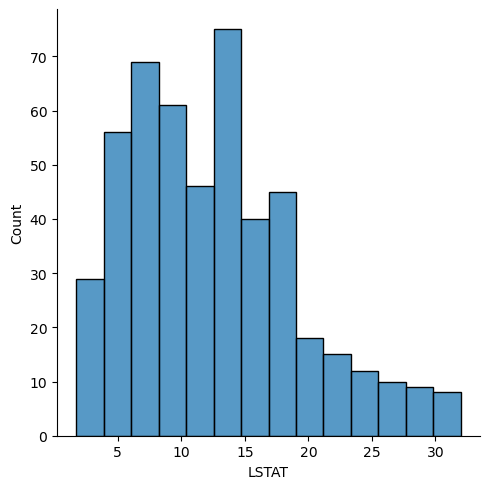

In [133]:
sns.displot(data=df_final['LSTAT'])

In [134]:
#Thus Outliers have been removed

<AxesSubplot:xlabel='RM'>

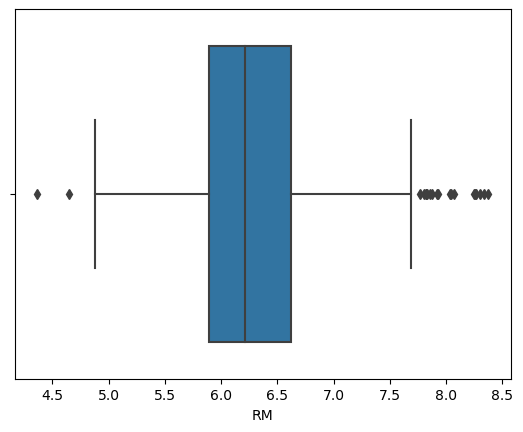

In [135]:
sns.boxplot(x='RM',data=df_final)

<AxesSubplot:xlabel='LSTAT'>

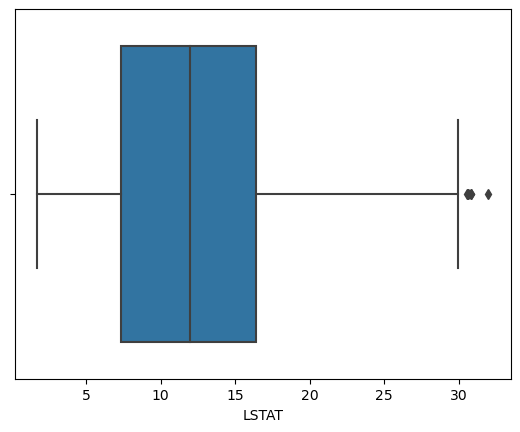

In [136]:
sns.boxplot(x='LSTAT',data=df_final)

## PLOTS

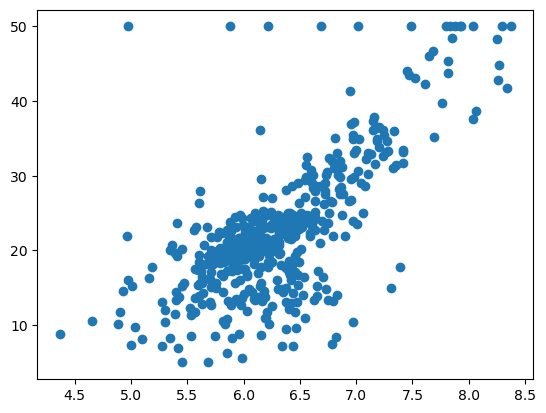

In [137]:
plt.scatter(df_final['RM'],df_final['MEDV'])

#The LSTAT column is directly proportional to housing prices

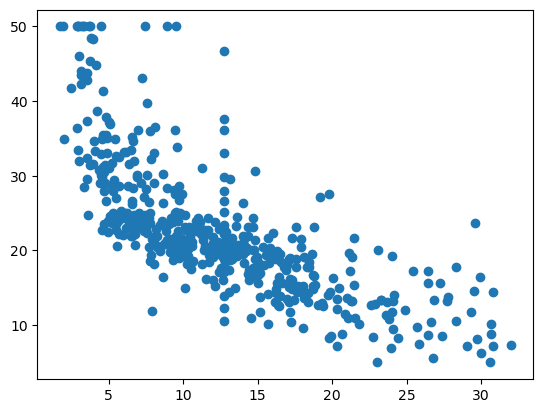

In [138]:
plt.scatter(df_final['LSTAT'],df_final['MEDV'])
#The LSTAT column is  inversely proportional to housing prices

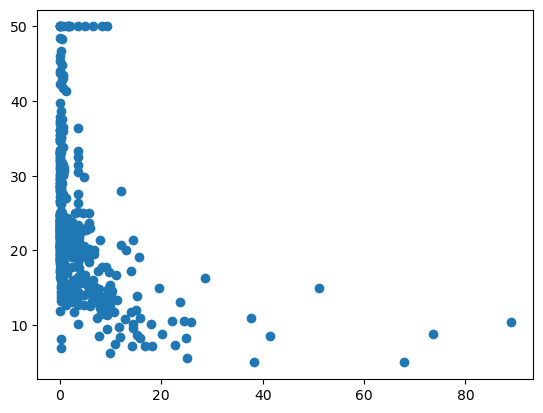

In [139]:
plt.scatter(df_final['CRIM'],df_final['MEDV'])

In [140]:
#we can see that the crime rate is also inversely proportional to the house prices

In [141]:
plt.hist(x=df_final['RM'],y=df_final['MEDV'],bins=30)


(array([ 1.,  0.,  1.,  1.,  7.,  3.,  3., 14., 11., 22., 31., 60., 46.,
        58., 33., 54., 32., 22., 21., 17., 11., 11.,  8.,  4.,  4.,  5.,
         4.,  3.,  0.,  6.]),
 array([4.368     , 4.50156667, 4.63513333, 4.7687    , 4.90226667,
        5.03583333, 5.1694    , 5.30296667, 5.43653333, 5.5701    ,
        5.70366667, 5.83723333, 5.9708    , 6.10436667, 6.23793333,
        6.3715    , 6.50506667, 6.63863333, 6.7722    , 6.90576667,
        7.03933333, 7.1729    , 7.30646667, 7.44003333, 7.5736    ,
        7.70716667, 7.84073333, 7.9743    , 8.10786667, 8.24143333,
        8.375     ]),
 <BarContainer object of 30 artists>)

C:\Users\Aakash LS\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


ValueError: setting an array element with a sequence.

<Figure size 640x480 with 1 Axes>

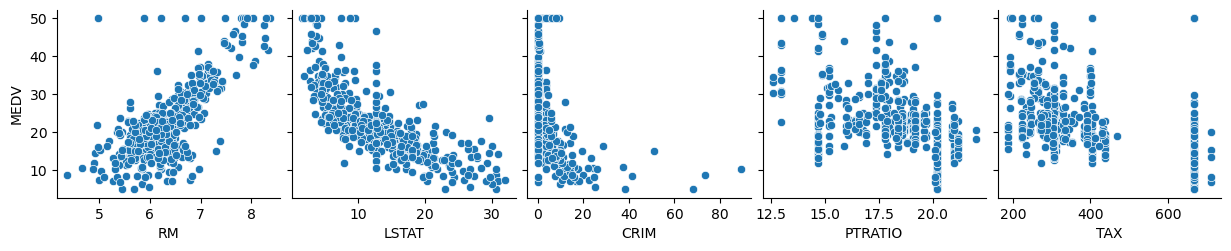

In [142]:
#PAIR PLOT


sns.pairplot(data=df_final, x_vars=['RM','LSTAT','CRIM','PTRATIO','TAX'],y_vars=['MEDV'])

<AxesSubplot:xlabel='RM', ylabel='Count'>

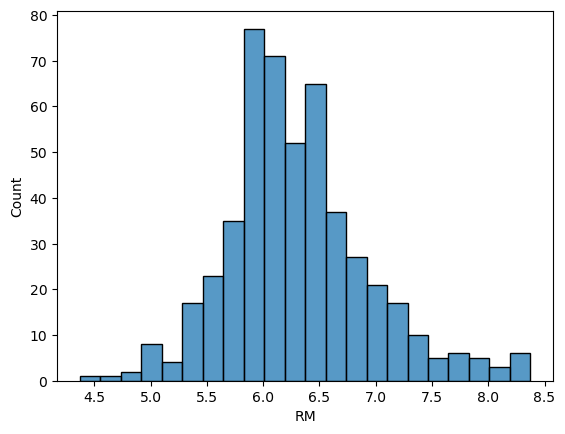

In [143]:
sns.histplot(data=df_final,x='RM')

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

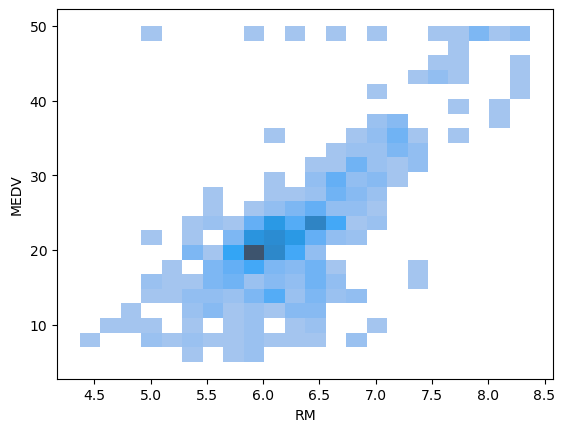

In [144]:
sns.histplot(data=df_final,x='RM',y='MEDV')

<AxesSubplot:xlabel='NOX', ylabel='MEDV'>

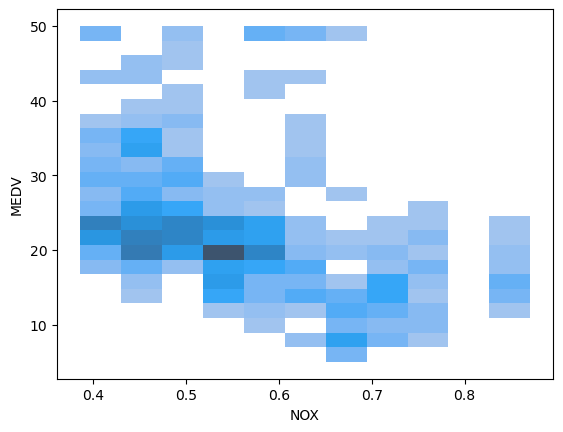

In [145]:
sns.histplot(data=df_final,x='NOX',y='MEDV')

In [146]:
#WE can also observe that more is the NOX concentration, lesser is the house prices around that location

## Prediction of house prices using Linear Regression

In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [148]:
df_final


,CRIM,NOX,RM,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,0.538,6.575,1,296,15.3,4.980000,24.0
1,0.02731,0.469,6.421,2,242,17.8,9.140000,21.6
2,0.02729,0.469,7.185,2,242,17.8,4.030000,34.7
3,0.03237,0.458,6.998,3,222,18.7,2.940000,33.4
4,0.06905,0.458,7.147,3,222,18.7,12.715432,36.2
...,...,...,...,...,...,...,...,...
501,0.06263,0.573,6.593,1,273,21.0,12.715432,22.4
502,0.04527,0.573,6.120,1,273,21.0,9.080000,20.6
503,0.06076,0.573,6.976,1,273,21.0,5.640000,23.9
504,0.10959,0.573,6.794,1,273,21.0,6.480000,22.0


In [149]:
newdf= df_final.drop('MEDV',axis=1)
newdf

,CRIM,NOX,RM,RAD,TAX,PTRATIO,LSTAT
0,0.00632,0.538,6.575,1,296,15.3,4.980000
1,0.02731,0.469,6.421,2,242,17.8,9.140000
2,0.02729,0.469,7.185,2,242,17.8,4.030000
3,0.03237,0.458,6.998,3,222,18.7,2.940000
4,0.06905,0.458,7.147,3,222,18.7,12.715432
...,...,...,...,...,...,...,...
501,0.06263,0.573,6.593,1,273,21.0,12.715432
502,0.04527,0.573,6.120,1,273,21.0,9.080000
503,0.06076,0.573,6.976,1,273,21.0,5.640000
504,0.10959,0.573,6.794,1,273,21.0,6.480000


In [150]:
X=newdf
y=df_final['MEDV']


In [151]:
X

,CRIM,NOX,RM,RAD,TAX,PTRATIO,LSTAT
0,0.00632,0.538,6.575,1,296,15.3,4.980000
1,0.02731,0.469,6.421,2,242,17.8,9.140000
2,0.02729,0.469,7.185,2,242,17.8,4.030000
3,0.03237,0.458,6.998,3,222,18.7,2.940000
4,0.06905,0.458,7.147,3,222,18.7,12.715432
...,...,...,...,...,...,...,...
501,0.06263,0.573,6.593,1,273,21.0,12.715432
502,0.04527,0.573,6.120,1,273,21.0,9.080000
503,0.06076,0.573,6.976,1,273,21.0,5.640000
504,0.10959,0.573,6.794,1,273,21.0,6.480000


In [152]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 493, dtype: float64

In [153]:
regr = LinearRegression()


In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 
#Using train_test_split to split the training and test data

In [155]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(394, 7)
(99, 7)
(394,)
(99,)


In [156]:
regr.fit(X_train, y_train)

#Fitting the model (Using linear regression)

LinearRegression()

In [244]:
y_pred=regr.predict(X_test)

#Predicting the model

In [158]:
print(X_train)

          CRIM    NOX     RM  RAD  TAX  PTRATIO      LSTAT
32    1.387990  0.538  5.950    4  307     21.0  27.710000
317   0.245220  0.544  5.782    4  304     18.4  15.940000
228   0.298190  0.504  7.686    8  307     17.4  12.715432
241   3.611874  0.428  6.095    6  300     16.6  12.400000
477  15.023400  0.614  5.304   24  666     20.2  24.910000
..         ...    ...    ...  ...  ...      ...        ...
498   0.239120  0.585  6.019    6  391     19.2  12.920000
269   0.090650  0.464  5.920    3  223     18.6  13.650000
168   2.300400  0.605  6.319    5  403     14.7  11.100000
291   0.078860  0.411  7.148    4  245     19.2   3.560000
265   0.761620  0.647  5.560    5  264     13.0  10.450000

[394 rows x 7 columns]


In [159]:
print(X_test)

        CRIM    NOX     RM  RAD  TAX  PTRATIO  LSTAT
224  0.31533  0.504  8.266    8  307     17.4   4.14
124  0.09849  0.581  5.879    2  188     19.1  17.58
40   0.03359  0.428  7.024    3  252     18.3   1.98
197  0.04666  0.404  7.107    2  329     12.6   8.61
472  3.56868  0.580  6.437   24  666     20.2  14.36
..       ...    ...    ...  ...  ...      ...    ...
366  3.69695  0.718  4.963   24  666     20.2  14.00
421  7.02259  0.718  6.006   24  666     20.2  15.70
318  0.40202  0.544  6.382    4  304     18.4  10.36
194  0.01439  0.401  6.604    1  265     15.6   4.38
217  0.07013  0.550  6.642    5  276     16.4   9.69

[99 rows x 7 columns]


In [160]:
print(y_train)

32     13.2
317    19.8
228    46.7
241    20.1
477    12.0
       ... 
498    21.2
269    20.7
168    23.8
291    37.3
265    22.8
Name: MEDV, Length: 394, dtype: float64


In [161]:
print("PREDICTED VALUES USING LINEAR REGRESSION:\n",y_pred)

PREDICTED VALUES USING LINEAR REGRESSION:
 [39.26153937 17.80649745 32.67503655 33.37240632 21.40189226 25.91297692
 28.0266887   2.98813202 21.6306774  15.19756074 28.09705285 25.90343658
 37.97755504 27.9323811  25.80482787 20.63934141 16.53665747  6.85685661
 32.18599159 10.8134299  34.43505623 14.54397039 15.58847887 22.61727326
 21.47057483 34.50872939 19.63135002 40.4771032  12.7559368  32.82001374
 27.27061417  4.70387281 20.09396503 27.78258471 20.900384   25.7649246
 39.42828598 29.4808878  29.87827825 18.06278724 20.51381512 16.57248964
  9.86381561 17.93704214 18.30152619 25.8472623  15.23505128 23.58522553
 19.66767398 39.51514834 17.17630196 26.70718613 26.14120517 37.07126828
 27.27192853 29.75228565 24.53277936 18.65917125 22.3701968  12.07548241
 25.55995952 21.6219512  24.94021491 22.97682961 12.1366259  34.16206767
 21.47425692 36.50831723 30.93842988  7.8347844  20.09525046 18.44524039
 31.73197746 33.1757428  24.14933096 19.81971212 24.82943957 25.65655318
 23.28940

In [162]:
print("ACTUAL VALUES\n",y_test)

ACTUAL VALUES
 224    44.8
124    18.8
40     34.9
197    30.3
472    23.2
       ... 
366    21.9
421    14.2
318    23.1
194    29.1
217    28.7
Name: MEDV, Length: 99, dtype: float64


In [163]:
# so here if we see, for the first test data, predicted house price is around 20.9 and actual data is 18.9
# Similarly for the 2nd dataset,  the predicted data value is 16.6 and actual data value is 15.4.  So using linear regression model 
# we are able to predict the approximate price of an house

In [164]:
from sklearn.metrics import r2_score,accuracy_score

In [165]:
print(r2_score(y_test,y_pred))

0.7640246902268475


In [ ]:
# THIS WE are getting an r2_score of 0.76 which tells that it is a better fit of the model to the data

In [167]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

In [168]:
print("MEAN SQUARED ERROR: ", mse)

MEAN SQUARED ERROR:  21.23818092281255


In [170]:
print(df_final.var())

CRIM          69.220212
NOX            0.013419
RM             0.395801
RAD           73.794720
TAX        27816.991301
PTRATIO        4.616431
LSTAT         43.362218
MEDV          80.685690
dtype: float64


In [ ]:
#SO the Mean squared error for our regression model is 21. 

In [245]:


print("Predicting Housing Prices using Regression: \n")

print("Acutal price:\t\t","Predicted Price:\t")
print("\n")
for i,j in zip(y_test,y_pred):
    print(i,"\t                  ",round(j,2))

    

Predicting Housing Prices using Regression: 

Acutal price:		 Predicted Price:	


44.8 	                   39.26
18.8 	                   17.81
34.9 	                   32.68
30.3 	                   33.37
23.2 	                   21.4
22.8 	                   25.91
26.6 	                   28.03
10.2 	                   2.99
19.4 	                   21.63
19.1 	                   15.2
26.2 	                   28.1
24.7 	                   25.9
50.0 	                   37.98
24.8 	                   27.93
23.8 	                   25.8
18.2 	                   20.64
13.5 	                   16.54
7.0 	                   6.86
31.6 	                   32.19
11.3 	                   10.81
35.4 	                   34.44
19.5 	                   14.54
23.1 	                   15.59
19.1 	                   22.62
18.9 	                   21.47
36.5 	                   34.51
20.1 	                   19.63
41.7 	                   40.48
16.5 	                   12.76
33.1 	                   32

## Prediction using SVM


In [194]:
from sklearn.svm import SVR


In [216]:
reg= SVR(kernel='linear')

In [217]:
reg.fit(X_train,y_train)

SVR(kernel='linear')

In [218]:
print(X_train)

          CRIM    NOX     RM  RAD  TAX  PTRATIO      LSTAT
32    1.387990  0.538  5.950    4  307     21.0  27.710000
317   0.245220  0.544  5.782    4  304     18.4  15.940000
228   0.298190  0.504  7.686    8  307     17.4  12.715432
241   3.611874  0.428  6.095    6  300     16.6  12.400000
477  15.023400  0.614  5.304   24  666     20.2  24.910000
..         ...    ...    ...  ...  ...      ...        ...
498   0.239120  0.585  6.019    6  391     19.2  12.920000
269   0.090650  0.464  5.920    3  223     18.6  13.650000
168   2.300400  0.605  6.319    5  403     14.7  11.100000
291   0.078860  0.411  7.148    4  245     19.2   3.560000
265   0.761620  0.647  5.560    5  264     13.0  10.450000

[394 rows x 7 columns]


In [219]:
print(y_train)

32     13.2
317    19.8
228    46.7
241    20.1
477    12.0
       ... 
498    21.2
269    20.7
168    23.8
291    37.3
265    22.8
Name: MEDV, Length: 394, dtype: float64


In [246]:
y_pred= reg.predict(X_test)

In [221]:
print("Predicted Values \n",y_pred)

Predicted Values 
 [37.89417066 18.65098472 31.3045816  32.62083473 18.91449235 25.32816084
 27.22458753  2.7062377  21.29618353 13.3979211  26.80037906 24.9862903
 36.76374049 26.85672637 25.32436475 20.4223718  14.4243989   8.73497974
 30.70071689  9.58396619 32.68956032 15.38285128 15.86442208 21.83888967
 21.41397818 33.33697032 19.62866742 38.889402   14.52982579 31.01914066
 26.14025416  4.68433442 17.3171696  26.45997396 20.31168866 25.09990252
 37.91281258 28.27468227 27.81837016 18.99582514 20.62259594 13.61937335
 11.44273555 16.39578211 19.18606696 24.85184824 14.66420072 22.63746274
 19.31564569 38.15986154 14.95799979 25.1979771  25.04007409 35.94541945
 26.21770158 28.50349391 23.63965857 16.22393918 21.7515914  13.35582343
 24.55429266 20.91135608 24.36254188 22.89017009 13.69568642 32.5202019
 19.48147359 35.78076378 30.32152796  9.49261978 17.60099962 16.59706702
 30.75394792 31.66784327 23.93202962 20.28224753 23.77572848 24.72264788
 22.55658312 19.07789924 18.249943

In [222]:
print("Actual Values \n:",y_test)

Actual Values 
: 224    44.8
124    18.8
40     34.9
197    30.3
472    23.2
       ... 
366    21.9
421    14.2
318    23.1
194    29.1
217    28.7
Name: MEDV, Length: 99, dtype: float64


In [247]:
print("Predicting Housing Prices using Regression: \n")

print("Acutal price:\t\t","Predicted Price:\t")
print("\n")
for i,j in zip(y_test,y_pred):
    print(i,"\t                  ",round(j,2))

Predicting Housing Prices using Regression: 

Acutal price:		 Predicted Price:	


44.8 	                   37.89
18.8 	                   18.65
34.9 	                   31.3
30.3 	                   32.62
23.2 	                   18.91
22.8 	                   25.33
26.6 	                   27.22
10.2 	                   2.71
19.4 	                   21.3
19.1 	                   13.4
26.2 	                   26.8
24.7 	                   24.99
50.0 	                   36.76
24.8 	                   26.86
23.8 	                   25.32
18.2 	                   20.42
13.5 	                   14.42
7.0 	                   8.73
31.6 	                   30.7
11.3 	                   9.58
35.4 	                   32.69
19.5 	                   15.38
23.1 	                   15.86
19.1 	                   21.84
18.9 	                   21.41
36.5 	                   33.34
20.1 	                   19.63
41.7 	                   38.89
16.5 	                   14.53
33.1 	                   31.

In [223]:
print("R2 score: ", r2_score(y_test,y_pred))

R2 score:  0.7459717908335534


In [224]:
print("MSE error:" , mean_squared_error(y_test,y_pred))

MSE error: 22.862972702362253


### So we can say that Regression gives a lower error and better R2 score than SVM


### - 

### -

### - 


 
### Regression:

### -
### -


### R2 score:  0.76
### MSE error: 21.2


### -
### -
### -




### SVM

### -
### -



### R2 score:  0.74
### MSE error: 22.86




## Thus, After preprocessing, data cleaning, analysing, and EDA and visualization we have predicted the house prices using Regression and SVM.

## By-

## Aakash LS

## 2020506001